Чулуунбаатар Хулан НПМбд-01-19

   # Табличные данные и PANDAS

   Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

   Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым).DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

   В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.
    
   Материалы:

   1. [Pandas за 10 минут из официального руководства](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
   2. [Документация](https://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
   3. [Примеры использования функционала](https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

   Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [301]:
%pylab inline  
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


данные можно скачать [отсюда](https://www.dropbox.com/s/5qq94wzmbw4e54r/data.csv?dl=0)

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк. Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [302]:
df = pd.read_csv('C:/Users/chuka/Downloads/data.csv')
df.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [303]:
print(f'количество строк: {len(df)}')
print(f'количество столбцов: {len(df.columns)}:')
print(', '.join(df.columns))

количество строк: 4622
количество столбцов: 5:
order_id, quantity, item_name, choice_description, item_price


####   2. [0.25 баллов] Ответьте на вопросы: Сколько заказов попало в выборку? Сколько уникальных категорий товара было куплено? (item_name)

In [304]:
print(f"заказов попало в выборке: {df['order_id'].nunique()}")
print(f"уникальных категорий товаров было куплено: {df['item_name'].nunique()}")

заказов попало в выборке: 1834
уникальных категорий товаров было куплено: 50


####    3. [0.25 баллов] Есть ли в данных пропуски? В каких колонках?

In [305]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

    Да, есть. в колонке "choice_description"
    
    Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [306]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [307]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col].fillna(0, inplace=True)
    if df[col].dtype == object:
        df[col].fillna('', inplace=True)

df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

#### 4. [0.5 баллов] Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [308]:
print("Тип колонки c ценой:", df["item_price"].dtype)
price_new = []
for i in df["item_price"]:
    price_new.append(float(i[1:]))
df["price_new_in_dollars"] = price_new
df

Тип колонки c ценой: object


,order_id,quantity,item_name,choice_description,item_price,price_new_in_dollars
0,1,1,Chips and Fresh Tomato Salsa,,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


Какая средняя/минимальная/максимальная цена у товара?

In [309]:
print("минимальная цена:")
df.groupby('item_name')['price_new_in_dollars'].min()

минимальная цена:


item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

In [310]:
print("максимальная цена:")
df.groupby('item_name')['price_new_in_dollars'].max()

максимальная цена:


item_name
6 Pack Soft Drink                        12.98
Barbacoa Bowl                            11.75
Barbacoa Burrito                         11.75
Barbacoa Crispy Tacos                    18.50
Barbacoa Salad Bowl                      11.89
Barbacoa Soft Tacos                      11.75
Bottled Water                            15.00
Bowl                                     22.20
Burrito                                   7.40
Canned Soda                               4.36
Canned Soft Drink                         5.00
Carnitas Bowl                            35.25
Carnitas Burrito                         18.50
Carnitas Crispy Tacos                    17.98
Carnitas Salad                            8.99
Carnitas Salad Bowl                      11.89
Carnitas Soft Tacos                      11.75
Chicken Bowl                             32.94
Chicken Burrito                          35.00
Chicken Crispy Tacos                     17.50
Chicken Salad                            10.98
Chi

In [311]:
print("средняя цена:")
df.groupby('item_name')['price_new_in_dollars'].mean()

средняя цена:


item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

Удалите старую колонку с ценой.

In [312]:
del df['item_price']
df

,order_id,quantity,item_name,choice_description,price_new_in_dollars
0,1,1,Chips and Fresh Tomato Salsa,,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


#### 5. [0.25 баллов] Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [313]:
print("5 самых дешёвых товаров: ")
print(*df[df["quantity"] == 1].sort_values(by = "price_new_in_dollars").drop_duplicates("item_name").head(5)["item_name"], 
      sep = "; ")

5 самых дешёвых товаров: 
Canned Soda; Bottled Water; Canned Soft Drink; Side of Chips; Chips


In [314]:
print("5 самых дорогих товаров: ")
print(*df[df["quantity"] == 1].sort_values(by = "price_new_in_dollars", ascending = False).drop_duplicates("item_name").head(5)["item_name"], 
      sep = "; ")

5 самых дорогих товаров: 
Steak Salad Bowl; Barbacoa Salad Bowl; Carnitas Salad Bowl; Steak Burrito; Barbacoa Burrito


#### 6. [0.5 баллов] Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [315]:
print(len(df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)]), "раз(-а)")

33 раз(-а)


#### 7. [0.5 баллов] Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [316]:
print("средний чек заказа: ", df.groupby("order_id")["price_new_in_dollars"].sum().mean())
print("среднее количество товаров: ", df.groupby("order_id")["quantity"].sum().mean())

средний чек заказа:  18.81142857142869
среднее количество товаров:  2.711014176663032


#### 8. [0.25 баллов] Сколько заказов содержали ровно 1 товар?

In [317]:
print(len(df.groupby("order_id").size()[df.groupby("order_id")["quantity"].sum() == 1]), "заказ(-ов)")

56 заказ(-ов)


#### 9. [0.25 баллов] Какая самая популярная категория товара?

In [318]:
print('самая популярная категория товара:', 
      df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).index[0])

самая популярная категория товара: Chicken Bowl


#### 10. [0.5 баллов] Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [319]:
df_Burrito = df[df['item_name'].str.contains('Burrito')]
df_Burrito

,order_id,quantity,item_name,choice_description,price_new_in_dollars
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49
21,11,1,Barbacoa Burrito,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",8.99
...,...,...,...,...,...
4608,1829,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75


In [320]:
print('виды:', ', '.join(list(df_Burrito['item_name'].unique())))
print('чаще всего покупают:', 
      df_Burrito.groupby('item_name')['quantity'].count().sort_values(ascending=False).index[0])
print("самый дорогой: ", 
      *df[df["quantity"] == 1].sort_values(by = "price_new_in_dollars", 
                                                   ascending = False).drop_duplicates("item_name")["item_name"].head(1))

виды: Steak Burrito, Chicken Burrito, Barbacoa Burrito, Carnitas Burrito, Veggie Burrito, Burrito
чаще всего покупают: Chicken Burrito
самый дорогой:  Steak Salad Bowl


#### 11. [0.75 баллов] В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно

In [321]:
x = df.groupby("order_id")["price_new_in_dollars"]
print(len(df.groupby("order_id").size()[x.max() / x.sum() > 0.4]), "заказа")

1624 заказа


#### 12. [0.75 баллов] Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [324]:
data2 = df[(df["choice_description"].str.contains("Diet Coke")) & (df["item_name"] == "Canned Soft Drink")]
s1 = data2["price_new_in_dollars"].sum()
data2.loc[:,"price_new_in_dollars"] *= (1.35/1.25)
s2 = data2["price_new_in_dollars"].sum()
print("было бы заработано больше на: ", (s2/s1 - 1) * 100, "%")

было бы заработано больше на:  7.999999999999985 %


#### 13. [0.75 баллов] Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [325]:
data_matrix = pd.DataFrame(np.random.rand(10,3))
data_matrix = data_matrix.rename({0: "index", 1: "column1", 2: "column2"}, axis = 'columns')
data_matrix

,index,column1,column2
0,0.114726,0.720658,0.904269
1,0.453934,0.493474,0.228746
2,0.347313,0.633652,0.703001
3,0.734987,0.237113,0.847798
4,0.964358,0.108223,0.694334
5,0.362161,0.558098,0.741112
6,0.084587,0.354714,0.327465
7,0.795137,0.156986,0.112499
8,0.503236,0.030326,0.791655
9,0.127377,0.052553,0.738851


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [326]:
data_matrix.to_csv('data_matrix.csv', index=False, header=False)

# Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/stable/users/index.html) с большим количеством [примеров](https://matplotlib.org/2.0.2/examples/index.html), но для начала достаточно знать про несколько основных типов графиков:

    1.plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
    2.hist — гистограмма, показывающая распределение некоторое величины;
    3.scatter — график, показывающий взаимосвязь двух величин;
    4.bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:

    1.на графиках должны быть подписаны оси;
    2.у визуализации должно быть название;
    3.если изображено несколько графиков, то необходима поясняющая легенда;
    4.все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
    5.если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие,которое незаметно в таких масштабах).
    7.сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [327]:
%matplotlib inline  
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [328]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=df.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(df.order_id.nunique())]

df['date'] = df.order_id.map(dates['date'])
df

,order_id,quantity,item_name,choice_description,price_new_in_dollars,date
0,1,1,Chips and Fresh Tomato Salsa,,2.39,2018-01-24
1,1,1,Izze,[Clementine],3.39,2018-01-24
2,1,1,Nantucket Nectar,[Apple],3.39,2018-01-24
3,1,1,Chips and Tomatillo-Green Chili Salsa,,2.39,2018-01-24
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2018-01-05
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,2018-01-29
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,2018-01-29
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,2018-01-23
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,2018-01-23


#### 1. [1 балл] Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

Text(0.5, 1.0, 'распределение средних цен товаров')

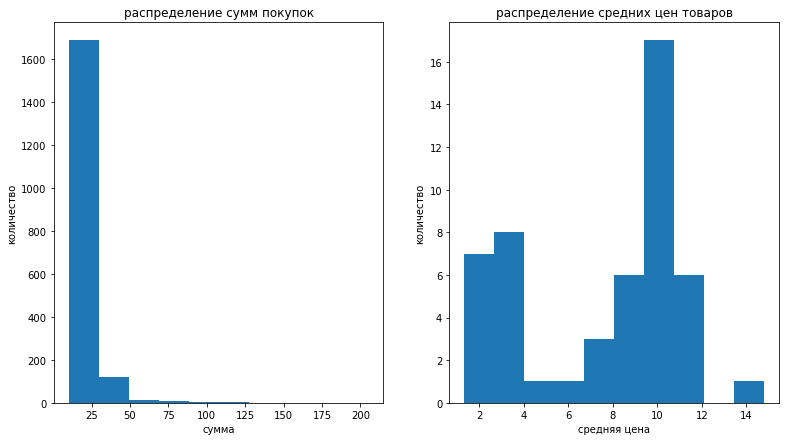

In [329]:
fig, ax = plt.subplots(1, 2, figsize = (13, 7))
ax[0].hist(df.groupby('order_id')['price_new_in_dollars'].sum())
ax[0].set_xlabel("сумма")
ax[0].set_ylabel("количество")
ax[0].set_title("распределение сумм покупок")
ax[1].hist(df.groupby('item_name')['price_new_in_dollars'].mean())
ax[1].set_xlabel("средняя цена")
ax[1].set_ylabel("количество")
ax[1].set_title("распределение средних цен товаров")

#### 2. [1 балл] Постройте график зависимости суммы покупок от дней.

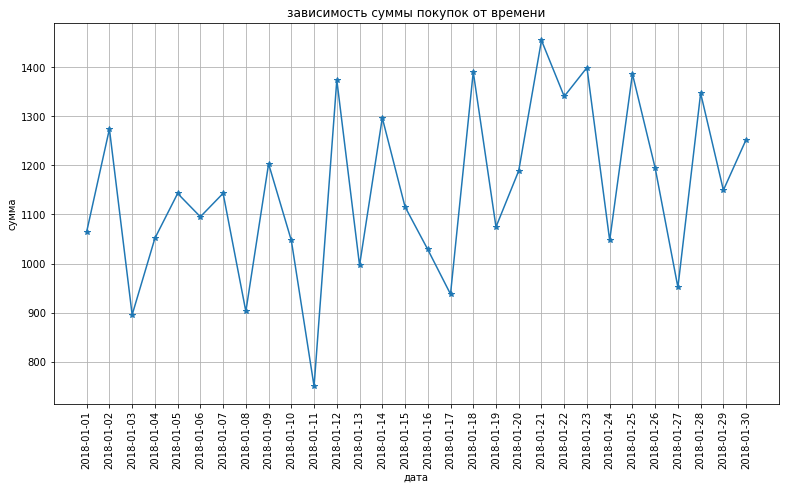

In [330]:
fig, ax = plt.subplots(figsize=(13,7))
df = df.groupby('date')
ax.plot(df['price_new_in_dollars'].sum(), marker = '*')
ax.set_xticks(np.arange(len(df)))
ax.set_xticklabels(df.size().keys(), rotation = 'vertical')
ax.set_xlabel("дата")
ax.set_ylabel("сумма")
ax.set_title("зависимость суммы покупок от времени")
ax.grid()

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.